#objective
To craete a CNN model and use the model to classify handwritten digits.



#workflow
1. Load the dataset MNIST and examine the structure


*   use any library to load the dataset (include both tensorflow and pytorch modules )
*   take a look at data, inspecting its size,shape and quantity.
* view random samples using either openCV or MATPLOTLIB of the handwritten digits and observe the complexiy of the image 
 2. using Numpy to prepare the dataset for the training


*   Ensure the format or shape of the data is appropriate for input into the model. (One-hot-encoding) https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
*   Ensure the data types are correct and data is normalized
3. Create a CNN with the following specifications
*   Input dimensions 28 * 28 * 1
*   Two Convolution layers (Kernel size 3*3) first with 64 filters, second 32. Use ReLU (Rectified Linear Unit) - activation layer
*   Max Pooling size 2*2
*   Dropout Layer 0.25
*   Dense layer with 128 outputs
*   Add another dropout layer with rate setting of 0.5
*   Add final dropout layer that indicates the class probabilities.
4. Train the CNN on the MNIST dataset prepared in step 2
*   Train for atleast 10 epochs using batch size of 32
5. Plot gragh showing how your training and validation loss and accuracy chached with respect to Epochs completed.
6. Save the model, will be used in part two.
7. Test the models on random samples on the test data.


 







# deliverable
Jupyter Notebook that documents the workflow as we take the MNIST dataset, view samples, convert into right shape/format as required for the deep learning library


# Loading the Handwritten Digit Dataset (MNIST)
"""

In [ ]:
from tensorflow.keras.datasets import mnist


load the dataset(divide into train and test data)

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()


#Display the number of samples in x_train, x_test, y_train, y_test

In [ ]:
print("initial shape or dimensions of x_train",str(x_train.shape)+'\n')
print('Number of samples in training data: '+str(len(x_train)))
print('Number of labels in training data: '+ str(len(y_train)))
print('Number of samples in test data: '+str(len(x_test)))
print('Number of labels in test data: '+str(len(y_test))+ '\n')
print('Dimensions of x_train: '+str(x_train[0].shape))
print('Labels in x_train: '+str(y_train.shape)+'\n')
print('Dimensions of x_test: '+str(x_test[0].shape))
print('Labels in x_test: '+str(y_test.shape)+'\n')

initial shape or dimensions of x_train (60000, 28, 28)

Number of samples in training data: 60000
Number of labels in training data: 60000
Number of samples in test data: 10000
Number of labels in test data: 10000

Dimensions of x_train: (28, 28)
Labels in x_train: (60000,)

Dimensions of x_test: (28, 28)
Labels in x_test: (10000,)



# Take a look at the images in the Dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Plot 6 images in subplots
#set the colormap to grey since our image data is in greyscale

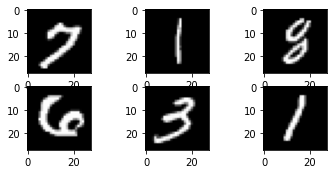

In [ ]:
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))
plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))



#Preparing Dataset for Keras

Keras Requires input data as a 4-d shape of (60000,28,28,1). When we initially loaded our data, x_train was (60000, 28,28). We need out label to be one-hot-encoded ().
"""

#Store rows and columns

In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#get data in right shape for keras.
#add a forth dimensio to our data (60000,28,28) to (60000,28,28,1)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],img_rows, img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows, img_cols,1)


#Store shape of single image for future use as a variable storing our input shape

In [ ]:
input_shape = (img_rows,img_cols,1)

#Change image type to float

In [ ]:
x_train=x_train.astype('float32')
x_test = x_test.astype('float32')


#Normalize data by changing the range from 0-255 to 0-1

In [ ]:
x_train /=255.0
x_test /=255.0
print('x_train shape: ',x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


#Perform One-hot-encoding of data labels

In [ ]:
from tensorflow.keras.utils import to_categorical

#one hot encode for output

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#count cols in our hot encoded matrix

In [ ]:
print('Number of classes: '+str(y_test.shape[1]))
num_classes = y_test.shape[1]


Number of classes: 10


#Create the CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import SGD

#create the model

In [ ]:
model = Sequential()

#First Convolutional Layer, Filter size 32 which reduces layer size to 26*26*32
#We use ReLU activation and our input shape 28*28*1

In [ ]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#Second Convolutional layer, Filter size of 64 which reduces our layer size to 24*24*64


In [ ]:
model.add(Conv2D(64, (3,3), activation='relu'))

#Use maxpooling with kernel size of 2*2 reducing size to 12*12*64

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 ro reduce overfitting

In [ ]:
model.add(Dropout(0.25))
#Flatten our Tensor object befor input into our dense layer
#A flatten op on a tensor reshapes the tensor to have the shape that is 
#equal to the number of elements in the tensor
#Our CNN goes from 12*12*64 to 9*16*1
model.add(Flatten())
#We use another Dropout layer
model.add(Dropout(0.5))
#Create a fully connected/Dense layer with an output of each class (10)
model.add(Dense(num_classes, activation='softmax'))
#Compileour model, creates an object that stores the model. We set the optimizer
#to use stochastic Gradient Descent (Learning rate of 0.01)
#We set loss function to be categorical_crossentropy as it's suitable for multiclass
#problems. And finally the metrics ( to judge the performance of the model)
#We use accuracy
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01),metrics=['accuracy'])
#The summary function can be used to display the model layers and parameters
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 9216)             

#Train the CNN


In [ ]:
batch_size = 32
epochs = 10
#Store the results for plotting later
# in our fit function we specify our dataset (X_train, y_train)
#batch_size (typically 16 to 128 --Depending on RAM). NUmber of epochs (10 to 100)
#Validation dataset (X_test, y_test)
#Verbose = 1, setting training to output performance metric every epoch
history = model.fit(x_train, y_train, batch_size=batch_size,epochs=epochs, 
                    verbose=1, 
                    validation_batch_size=(x_test,y_test))
#We obtain accuracy score using the evaluative fn 
score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ', score[0])
print('Test Accuracy: ', score[1])

Epoch 1/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.5629 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.2700 - accuracy: 0.9196
Epoch 3/10
1875/1875 [==============================] - 149s 80ms/step - loss: 0.1781 - accuracy: 0.9479
Epoch 4/10
1875/1875 [==============================] - 150s 80ms/step - loss: 0.1417 - accuracy: 0.9579
Epoch 5/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.1202 - accuracy: 0.9639
Epoch 6/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1115 - accuracy: 0.9661
Epoch 7/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.1015 - accuracy: 0.9696
Epoch 8/10
1875/1875 [==============================] - 147s 78ms/step - loss: 0.0931 - accuracy: 0.9724
Epoch 9/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.0900 - accuracy: 0.9727
Epoch 10/10
1875/1875 [==============================] 

#plot loss charts

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import matplotlib.pyplot as plt
#use the history object to get our saved performance results
history_dict = History.history

#extract the loss and the validation losses
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(loss_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

NameError: ignored

#Plot of Accuracy

In [ ]:
#Plotting the accuracy chart
import matplotlib.pyplot as plt
#Use the history object to get our svaed performace results
from keras.callbacks import History 
history_dict=history.history


NameError: ignored

#extract the loss and the validation losses

In [2]:
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(acc_values) +1)


NameError: ignored

#Plot line charts for both validation and loss

In [1]:
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()



NameError: ignored

#saving the model

In [ ]:
model.save('mnist_simple_cnn_10_Epochs.h5')
print('model is saved')
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), axis=1),axis=0))
  